In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

spectrum_train = pd.read_excel("spectrum_train.xlsx")
spectrum_test = pd.read_excel("spectrum_valid.xlsx")
temp_train = pd.read_excel("temp_train.xlsx")
temp_test = pd.read_excel("temp_valid.xlsx")

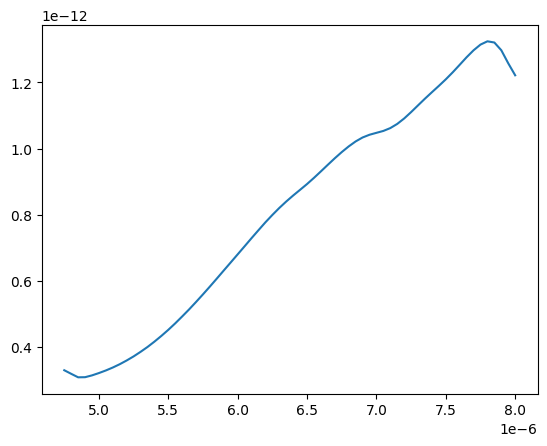

In [2]:
plt.plot(spectrum_train.iloc[50])

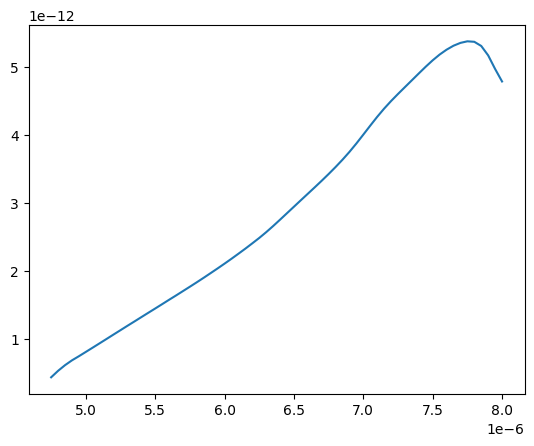

In [3]:
plt.plot(spectrum_test.iloc[50])

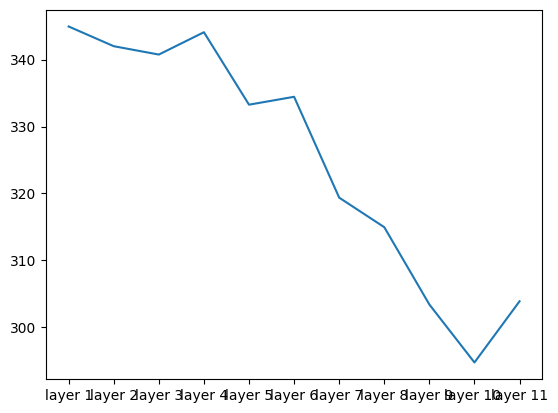

In [6]:
plt.plot(temp_train.iloc[30])

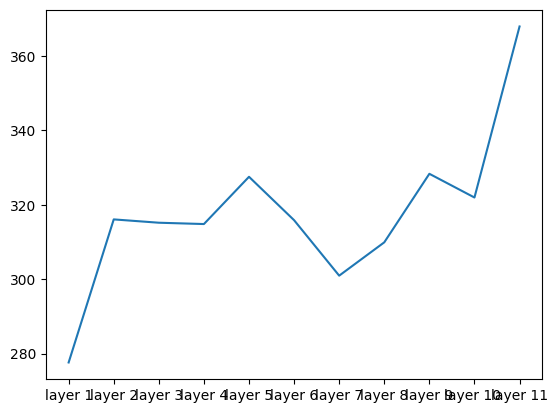

In [7]:
plt.plot(temp_test.iloc[50])